In [1]:
import pandas as pd
import numpy as np
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
data = pd.read_csv("F:\\Datasets\\data_stocks.csv")
data.replace([np.inf, -np.inf], np.nan)
data.dropna(inplace=True)
print("Number of Records in input data : ",len(data["DATE"]))

Number of Records in input data :  41266


In [3]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# Stock analysis of NASDAQ.CBOE

In [4]:
stockname="NASDAQ.CBOE"
from datetime import datetime
date=pd.date_range("2000-01-01", periods=100,freq='B').to_pydatetime().tolist()
date=pd.DataFrame(date,columns=["DATE"])
stock=pd.DataFrame()
stock=pd.DataFrame(data[stockname][41166:41266])
date=date.reset_index(drop=True)
stock=stock.reset_index(drop=True)
aapl=pd.concat([date,stock],axis=1)

In [5]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         100 non-null    datetime64[ns]
 1   NASDAQ.CBOE  100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [6]:
aapl.DATE = pd.to_datetime(aapl.DATE)
aapl.set_index('DATE', inplace=True)
print(aapl.head(5))
print(aapl.tail(5))

            NASDAQ.CBOE
DATE                   
2000-01-03       100.84
2000-01-04       100.84
2000-01-05       100.84
2000-01-06       100.81
2000-01-07       100.85
            NASDAQ.CBOE
DATE                   
2000-05-15       100.89
2000-05-16       100.88
2000-05-17       100.86
2000-05-18       100.83
2000-05-19       100.89


Text(0.5, 0, 'Year')

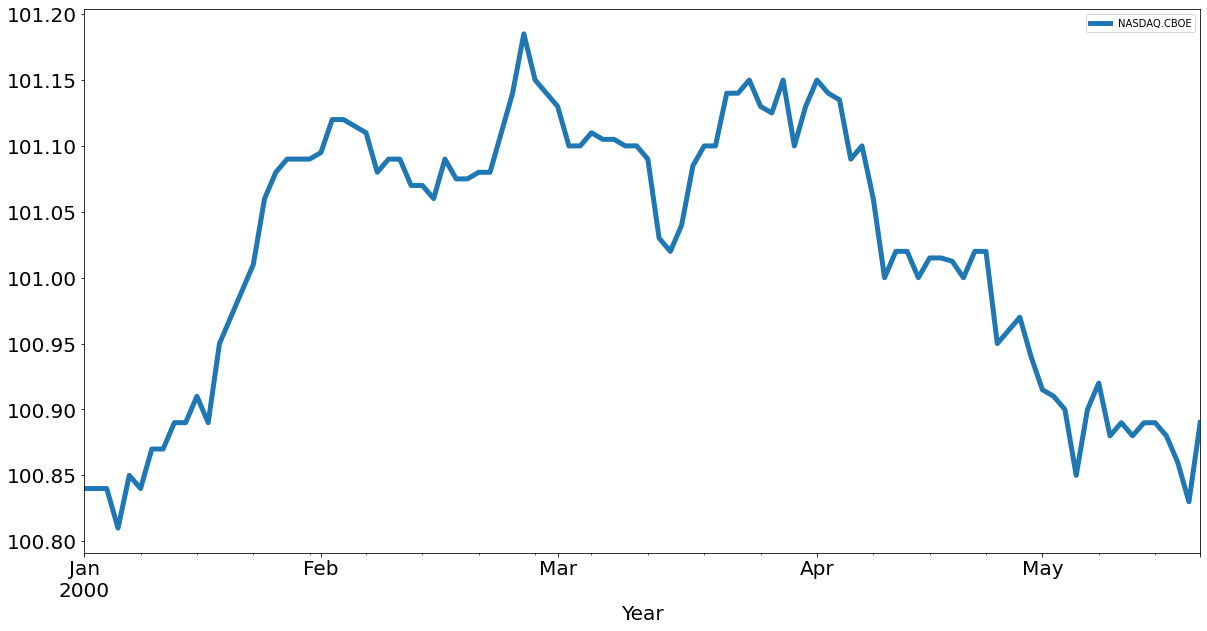

In [7]:
aapl.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [8]:
aapl.describe().T

,count,mean,std,min,25%,50%,75%,max
NASDAQ.CBOE,100.0,101.020974,0.102619,100.81,100.91375,101.06,101.1,101.185


Differencing
Differencing is a decomposition process through which trend and seasonality are eliminated. Here, we usually take the difference of observation with particular instant with previous instant.

First-order differencing

Text(0.5, 0, 'Year')

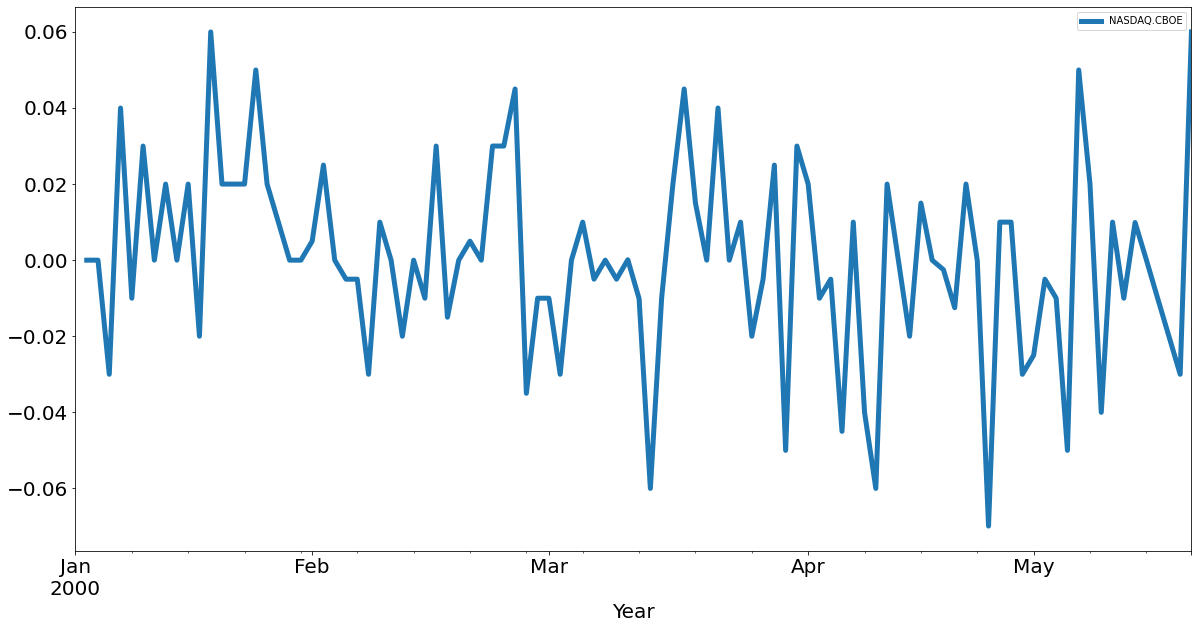

In [9]:
aapl.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 1.0, 'AAPL Cumulative Returns')

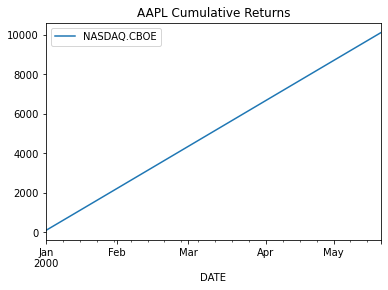

In [10]:
# Comulative Return
dr = aapl.cumsum()
dr.plot()
plt.title('AAPL Cumulative Returns')

Auto regression
The approach of auto regression is basically an extended version of simple and multiple linear regressions. The only major difference is that the predictive relationship between the dependent and independent variables are assumed with in the previous values of same time series.
As a proper definition we can say that
“A statistical model is said to be autoregressive if it predicts future values based on previous values.”
Although there is no proved evidence that this has worked out most of the times in history, there is a major application of auto regression is still processed in financial markets and weather forecasting.
The number of predictor variables is usually determined by the statistician which is nothing but the count of previous values that the asset had as a market or intrinsic measure.
Mathematically, it is denoted as –
AR(parameter) where parameter is the number of independent variables or the count of past values considered for forecasting.
For example,
AR (1) means that it is an autoregressive process where the immediate single past value in a defined time period is considered as independent variable.
AR (2) means that it is an autoregressive process where the immediate two past values in a defined time period is considered as independent variables.
AR (n) means that it is an autoregressive process where the immediate n past values in a defined time period is considered as independent variables.
AR (0) is the easiest form of regression where the future value is considered as similar to the current value but this technically does not holds in growing or depreciating asset.
We can define AR(4) mathematically as,
Yt = B1 (Yt-1) + B2 (Yt-2) + B3 (Yt-3) + B4 (Yt-4)
Where,
Yt = Predicted value for next time period.
Yt-1 = Recorded value for immediate past time period.
Yt-2= Recorded value for immediate second past time period.
Yt-1 = Recorded value for immediate third past time period.
Yt-1 = Recorded value for immediate fourth past time period.
B1 = Coefficient of auto regression for immediate past time period value.
B2 = Coefficient of auto regression for immediate second past time period value.
B3 = Coefficient of auto regression for immediate third past time period value.
B4 = Coefficient of auto regression for immediate fourth past time period value.


Text(0.5, 1.0, 'AAPL Autocorrelation plot')

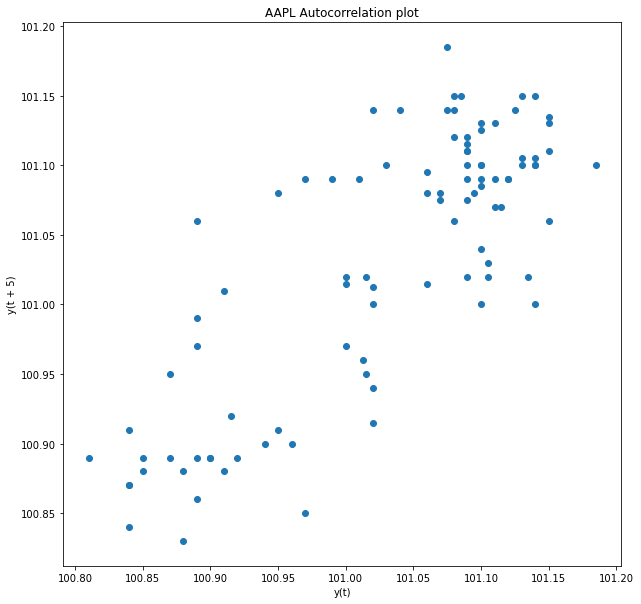

In [11]:
plt.figure(figsize=(10,10))
lag_plot(aapl[stockname], lag=5)
plt.title('AAPL Autocorrelation plot')

ACF (Autocorrelation Factor)
It is the correlation between the observations at the current time spot and observations at the previous time spots.
PACF (Partial Autocorrelation Factor)
The correlation between the observations at two time spots given that we consider both observations are correlated to the observations at the other time spots. For example, today’s stock price can be correlated to the day before yesterday, and yesterday can also be correlated to the day before yesterday. Then, PACF of the yesterday is the real correlation between today and yesterday after taking out the influence of the day before yesterday.

Procedure for determining ACF and PACF
· De-trending the data
The foremost step which we need to perform is to identify whether a presence of trend is visible in the data and if so, we need to detrend the data for the smooth calculations. We discussed about the various methods to eliminate trend from the data in Part-2 of the article. Usually, one-lag differencing is used here.
· Identifying the significant terms
Use PACF to determine the significant terms used in AR model. The numbers of terms determine the order of the model.
For example, if the PACF of yesterday’s stock price is significant and all PACF of all other days are not significant. Then yesterday’s stock price will be used to predict today’s stock price. This type of AR model is called first order AR model. It is represented as AR (1).
Similar procedure can be used for identifying significant terms for MA model. We will be using ACF to determine the significant terms used in MA model.
· Choosing which model to be used
We should initially calculate the significant terms for both AR and MA using PACF and ACF respectively. Then the next step is to determine which one have more simpler terms that could work well for the implementation.

A correlogram representing ACF and PACF
According to the above diagram,
· Number significant terms in ACF = 6
· Number significant terms in PACF = 8
Obviously we are going to use MA in this model since ACF < PACF.
ACF = 6 signifies that if we are using MA model, we should use observations of 6 previous time spots which means MA (6).
PACF = 8 signifies that if we are using AR model, we should use observations of 8 previous time spots which means AR (8).
The minimal order out of AR and MA is chosen in order to reduce the complexity of the model. We would have chosen AR instead of MA if the order of PACF is less than ACF.

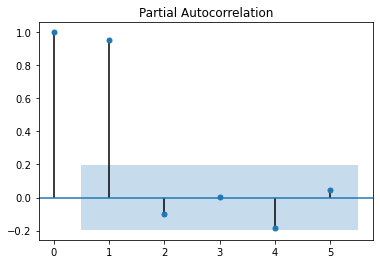

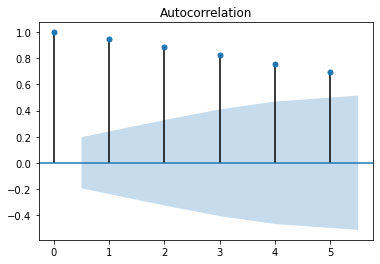

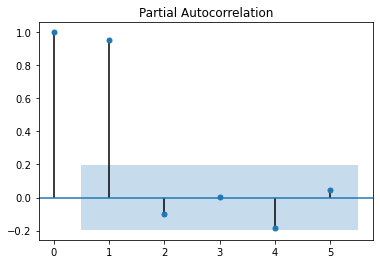

In [12]:
# import the plotting functions for act and pacf  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(aapl[stockname], lags=5)
plot_pacf(aapl[stockname], lags=5)

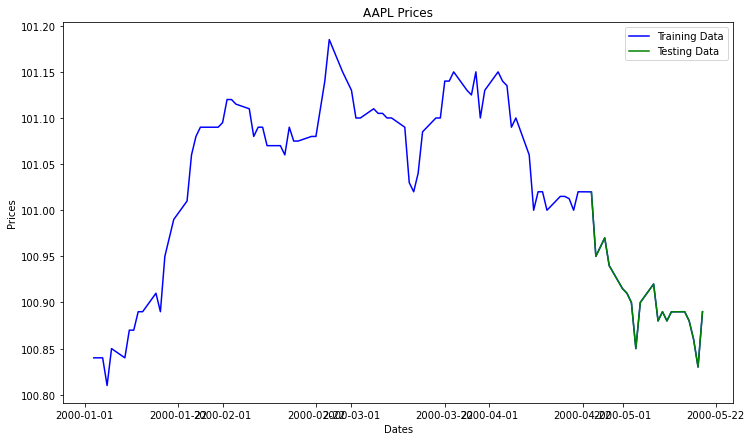

In [13]:
train_data, test_data = aapl[0:int(len(aapl)*0.8)], aapl[int(len(aapl)*0.8):]
plt.figure(figsize=(12,7))
plt.title('AAPL Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(aapl[stockname], 'blue', label='Training Data')
plt.plot(test_data[stockname], 'green', label='Testing Data')
plt.legend()

Mean absolute error
It is the average of absolute of difference between the predicted values and true values. The differences are taken as absolute values in order to remove the cancellation of positive and negative values with each other.


In [14]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data[stockname].values
test_ar = test_data[stockname].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.001
Symmetric mean absolute percentage error: 0.051


ARIMA Algorithm
ARIMA stands for Autoregressive integrated moving average. It is nothing but the integration of both AR and MA in order to produce more sophisticated and accurate model. In ARIMA,”I” stands for integrated. It represents differencing used to handle non-stationary data.
For the above shown diagram,
If we took 1 level differencing to detrend the data, the integration factor will be 1.Then we can represent the model combining both AR and MA as ARIMA (8, 1, 6).
If we took 2 level differencing to detrend the data, the integration factor will be 2.Then we can represent the model combining both AR and MA as ARIMA (8, 2, 6).
Mathematically, It is represented as ARIMA(p,d,q)
Here,
p = number of significant terms in PACF for trend
d = Order of differencing for trend
q= number of significant terms in ACF for trend

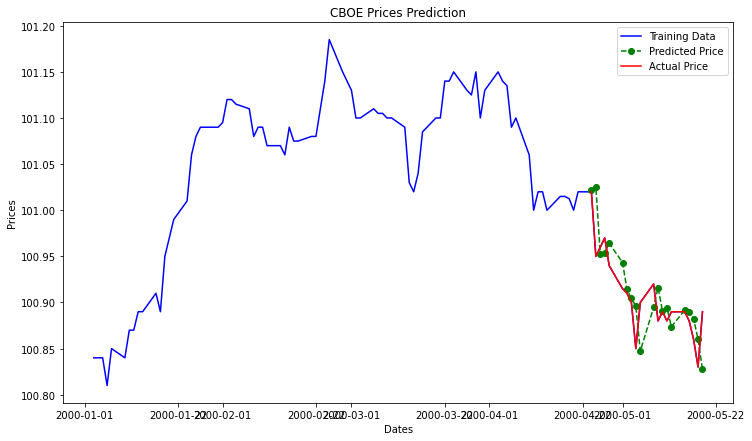

In [15]:
plt.figure(figsize=(12,7))
plt.plot(aapl[stockname],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data[stockname], color='red', label='Actual Price')
plt.title('CBOE Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

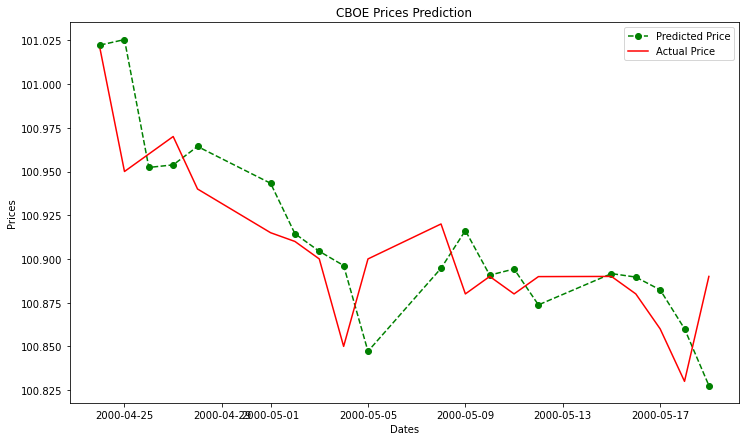

In [16]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data[stockname], color='red', label='Actual Price')
plt.title('CBOE Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()




In [17]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

     Actual   Predicted
0  101.0199  101.022298
1  100.9500  101.025437
2  100.9600  100.952319
3  100.9700  100.953793
4  100.9400  100.964314
5  100.9150  100.943266
6  100.9100  100.914444
7  100.9000  100.904380
8  100.8500  100.896231
9  100.9000  100.847186
